In [1]:
from GP_class import GaussianProcessRegressor
import jax.numpy as jnp
from jax import jacrev, lax, random, tree_map, vmap,jit
import gp_plot

In [2]:
X = jnp.arange(-5, 5, 0.2).reshape(-1, 1)
X_train = jnp.arange(-3, 4, 1).reshape(-1, 1)
# X_train = jnp.arange(-5, 5, 0.4).reshape(-1, 1)
def f(x):
    return jnp.sin(x)
Y_train = vmap(f)(*X_train.T)
# default is non-noise:
gpr = GaussianProcessRegressor()
gpr.fit(X_train, Y_train)


use scipy minimize to optimize

In [3]:
# res = gpr.optim_np()
result = gpr.optim_jaxopt()
print(result)

OptStep(params=Array([0.2869295 , 0.66650665], dtype=float32), state=ScipyMinimizeInfo(fun_val=Array(7.092639, dtype=float32, weak_type=True), success=True, status=0, iter_num=15, hess_inv=LbfgsInvHessProduct(sk=[[-2.43760758e-02 -5.01054010e-04]
 [-1.67393574e-02  1.64814604e-05]
 [-1.48160974e-02  4.89568300e-05]
 [-1.23764902e-02  1.06529437e-05]
 [-3.63581933e-02  2.40337285e-02]
 [-1.74301141e-01 -4.79503167e-02]
 [-5.70999497e-02  1.16360184e-02]
 [-7.60940533e-02 -7.61973479e-03]
 [-2.49520592e-02  8.14262479e-03]
 [-2.19948552e-02 -4.14722480e-04]], yk=[[-6.56087976e-03 -1.17675900e-02]
 [-2.43258011e-03  1.71022303e-03]
 [-1.17480836e-03  2.03024509e-03]
 [-5.22064773e-04  5.21931404e-04]
 [-6.10389948e-01  1.33174819e+00]
 [-3.80044550e-01 -9.13909078e-02]
 [-1.92316502e-01  6.27892122e-01]
 [-9.52759273e-02 -1.13599136e-01]
 [-2.46454757e-02  2.80202244e-01]
 [-1.00746294e-02 -5.37284790e-03]]), num_fun_eval=Array(19, dtype=int32), num_jac_eval=Array(19, dtype=int32), num_he

0.2869295 0.66650665


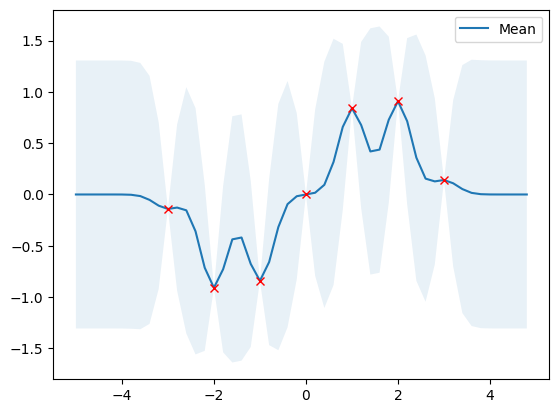

In [4]:
print(gpr.l, gpr.sigma_f)
mu_s, cov_s = gpr.predict(X, return_cov=True)
gp_plot.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

with noise:

In [5]:
noise = 0.2
X_train = jnp.arange(-3, 4, 1).reshape(-1, 1)
Y_train = jnp.sin(X_train) + noise * random.normal(random.PRNGKey(0), X_train.shape)
Y_train = Y_train.ravel()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 7.06878519154502
        x: [ 8.244e-01  7.121e-01]
      nit: 6
      jac: [-4.441e-06 -9.415e-06]
     nfev: 27
     njev: 9
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
[ 0.01110378  0.01886529  0.02987305  0.04384598  0.05910792  0.07198693
  0.07654298  0.06494683  0.02870159 -0.0393863  -0.1429366  -0.2801299
 -0.44292048 -0.61766416 -0.78698754 -0.9323156  -1.0364056  -1.0855066
 -1.071134   -0.9916018  -0.8532001  -0.6704416  -0.4645518  -0.25968352
 -0.07726355  0.07000381  0.18224175  0.27259043  0.3626459   0.4741044
  0.6192568   0.79381645  0.97513187  1.1270883   1.2105458   1.1959033
  1.0733235   0.85686684  0.58104175  0.2911589   0.03111845 -0.16710252
 -0.28909612 -0.33782244 -0.32880712 -0.28324968 -0.22166336 -0.15973175
 -0.10682432 -0.06662855] [[ 5.0548542e-01  4.8955476e-01  4.4610810e-01 ... -2.6372276e-05
  -1.7891572e-05 -1.1276630e-05]
 [ 4.8955476

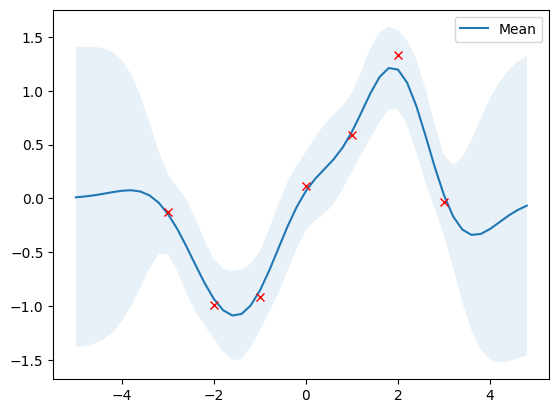

In [6]:
gpr = GaussianProcessRegressor(sigma_y=noise)
gpr.fit(X_train, Y_train)
res = gpr.optim_np()
print(res)
mu_s, cov_s = gpr.predict(X, return_cov=True)
print(mu_s, cov_s)
gp_plot.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

OptStep(params=Array([0.29785904, 0.72552794], dtype=float32), state=ScipyMinimizeInfo(fun_val=Array(7.942955, dtype=float32, weak_type=True), success=True, status=0, iter_num=11, hess_inv=LbfgsInvHessProduct(sk=[[-2.46088310e-02 -9.33181282e-02]
 [-2.79643444e-01 -1.85885183e-01]
 [-1.54891920e-01  9.78002919e-03]
 [-5.99888687e-02 -1.84005550e-02]
 [-5.24406909e-02  1.14912921e-02]
 [-3.58636039e-02  9.58181266e-04]
 [-2.85210487e-02  6.61799199e-04]
 [-2.15363569e-02  1.55620582e-04]
 [-1.75724977e-02  6.18057836e-05]
 [-1.45916740e-02  1.69664164e-05]], yk=[[ 6.29910633e-01 -8.54528874e-01]
 [ 9.43881273e-03 -1.01936677e+00]
 [-5.95867664e-01  1.12397386e+00]
 [-6.83284849e-02 -2.84624353e-01]
 [-8.67019221e-02  3.49637173e-01]
 [-2.73528118e-02  4.35442366e-02]
 [-1.24147879e-02  2.27914304e-02]
 [-5.11256047e-03  6.07468421e-03]
 [-2.27574899e-03  2.33702827e-03]
 [-1.01756409e-03  7.38650415e-04]]), num_fun_eval=Array(16, dtype=int32), num_jac_eval=Array(16, dtype=int32), num_he

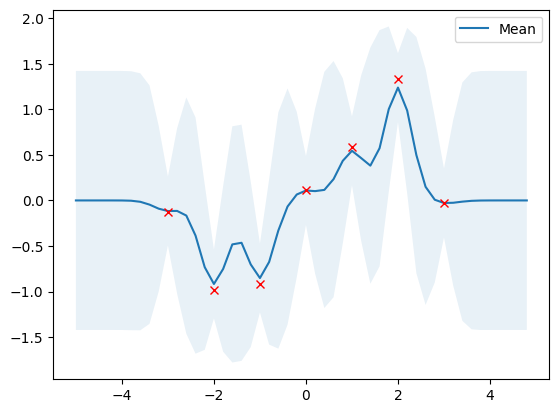

In [7]:
gpr = GaussianProcessRegressor(sigma_y=noise)
gpr.fit(X_train, Y_train)
res = gpr.optim_jaxopt()
print(res)
mu_s, cov_s = gpr.predict(X, return_cov=True)
gp_plot.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)